In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import torch
from torch import nn
from torchvision import transforms, models
import torch.nn.functional as F
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [3]:
from src.hooks import *
from src.core import *
from src.transforms import denorm
from src.interp.gradCAM import gradcam

In [4]:
net = models.resnet18(pretrained=True)

In [5]:
img = torch.randn(1,3,224,224)

In [6]:
IMSIZE = 224
img = Image.open('dog.jpg')
tfms = transforms.Compose([
    transforms.Resize((IMSIZE, IMSIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])
])
img = tfms(img)

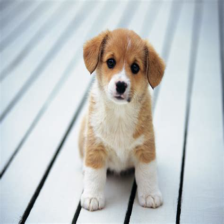

In [7]:
Image.fromarray(denorm(img))

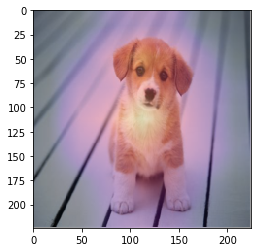

In [8]:
gradcam(net, img[None], 232, layer=7);

In [9]:
with hook_output(list(net.children())[3]) as hook_a:
    preds = net(img[None])
        
acts  = hook_a.stored[0].cpu()

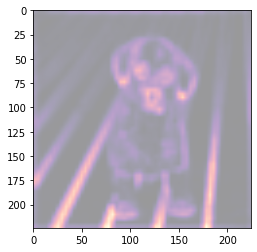

In [10]:
_,ax = plt.subplots()
sz = [224,224]
ax.imshow(F.relu(acts.sum(0)), alpha=0.4, extent=(0,*sz[::-1],0), interpolation='bilinear', cmap='magma')